In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [39]:
# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to include channel dimension (grayscale → 1 channel)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


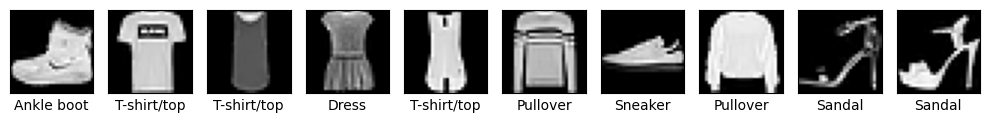

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()


In [41]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer for 10 classes
])


In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [43]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7719 - loss: 0.6365 - val_accuracy: 0.8726 - val_loss: 0.3530
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8820 - loss: 0.3194 - val_accuracy: 0.8875 - val_loss: 0.3094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9024 - loss: 0.2653 - val_accuracy: 0.8853 - val_loss: 0.3055
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9152 - loss: 0.2290 - val_accuracy: 0.9002 - val_loss: 0.2701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9223 - loss: 0.2038 - val_accuracy: 0.8968 - val_loss: 0.2892


In [44]:
#Picks a test image and shows it as a 28×28 grayscale heatmap with pixel values
#Chooses a learned filter from the first convolutional layer and displays its values
#Applies the filter:
#Convolution output
#ReLU output
#MaxPooling output

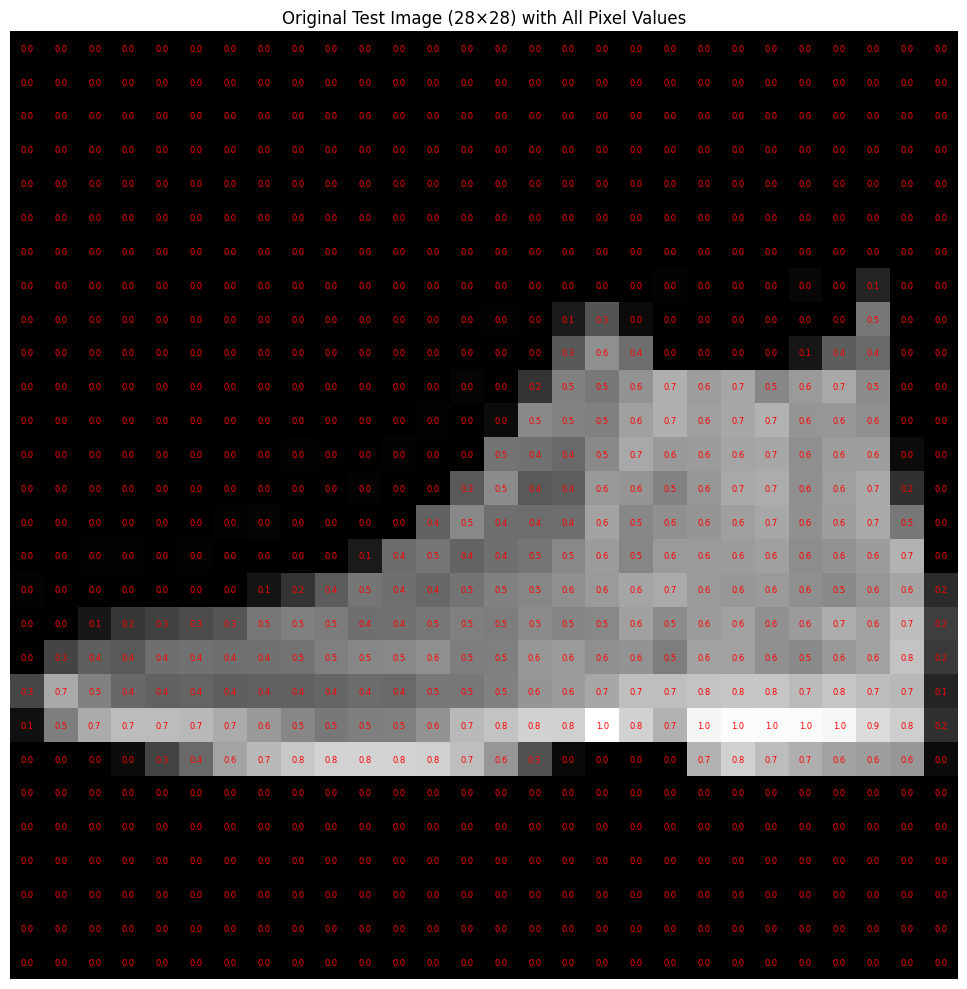

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Choose a test image and reshape
img = x_test[0].reshape(1, 28, 28, 1)

# 2. Get a learned filter from the trained model
filters, biases = model.layers[0].get_weights()
filter_index = 0  # pick filter 0
filt = filters[:, :, 0, filter_index]  # shape: (3, 3)
bias = biases[filter_index]

# ------------------------
#Show original image as heatmap
plt.figure(figsize=(10, 10))
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title("Original Test Image (28×28) with All Pixel Values")
plt.axis('off')

# Annotate every pixel with its value
for y in range(28):
    for x in range(28):
        plt.text(x, y, f"{img[0, y, x, 0]:.1f}", color='red', fontsize=6,
                 ha='center', va='center')

plt.tight_layout()
plt.show()


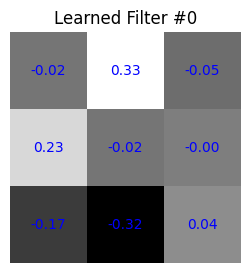

In [46]:
# ------------------------
# Show selected filter as heatmap with values
plt.figure(figsize=(3, 3))
plt.imshow(filt, cmap='gray')
plt.title(f"Learned Filter #{filter_index}")
plt.axis('off')
for y in range(3):
    for x in range(3):
        plt.text(x, y, f"{filt[y, x]:.2f}", color='blue', fontsize=10, ha='center', va='center')
plt.show()


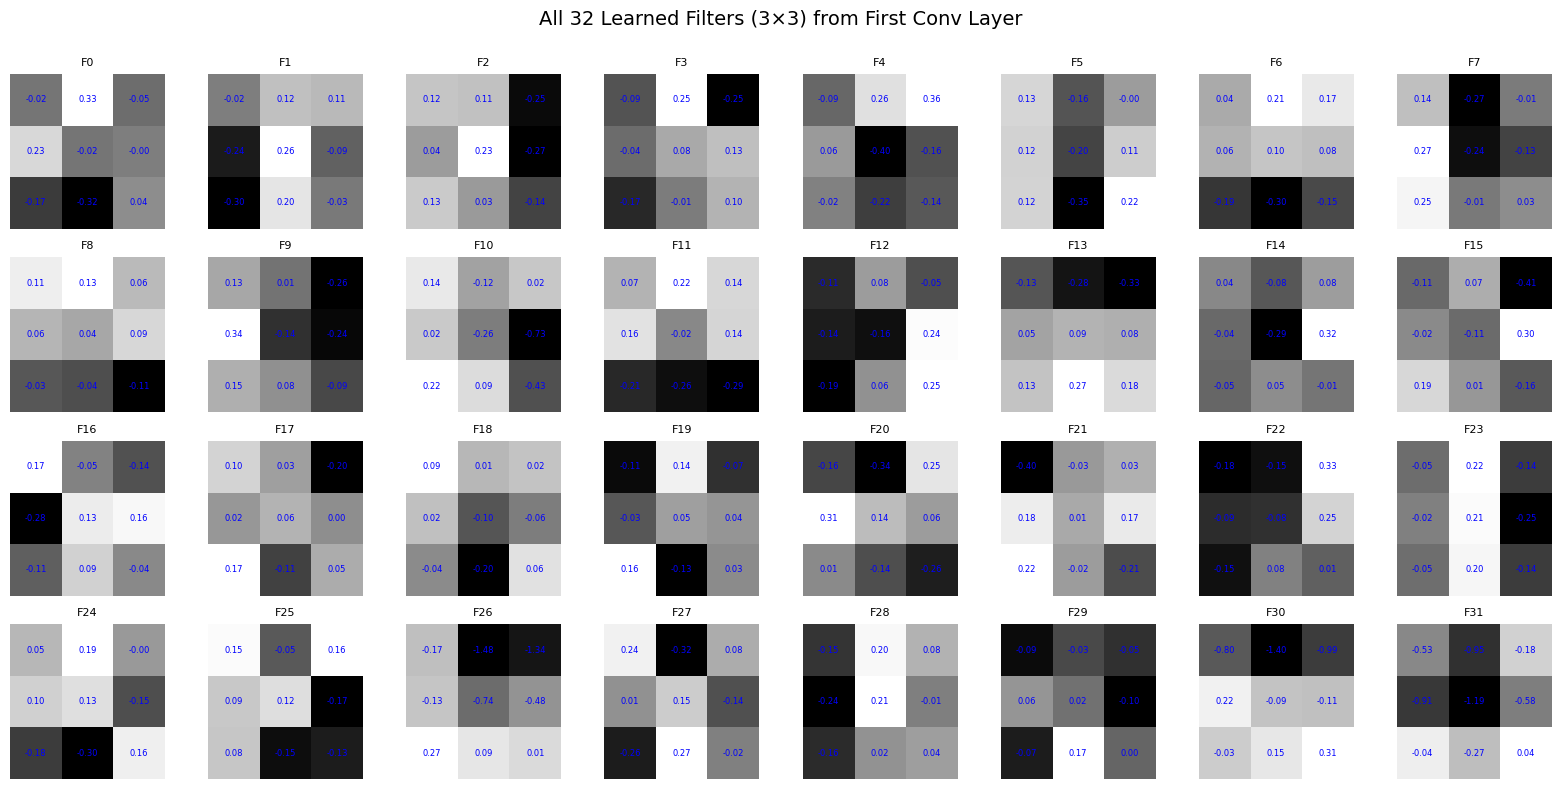

In [55]:
import matplotlib.pyplot as plt

# Get all filters from the first Conv2D layer
filters, biases = model.layers[0].get_weights()  # filters.shape: (3, 3, 1, 32)

plt.figure(figsize=(16, 8))
for i in range(32):
    filt = filters[:, :, 0, i]  # get i-th 3×3 filter
    ax = plt.subplot(4, 8, i+1)
    ax.imshow(filt, cmap='gray')
    ax.set_title(f'F{i}', fontsize=8)
    ax.axis('off')

    # Add values inside each cell
    for y in range(3):
        for x in range(3):
            ax.text(x, y, f"{filt[y, x]:.2f}", color='blue', fontsize=6,
                    ha='center', va='center')

plt.suptitle("All 32 Learned Filters (3×3) from First Conv Layer", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # to make room for suptitle
plt.show()


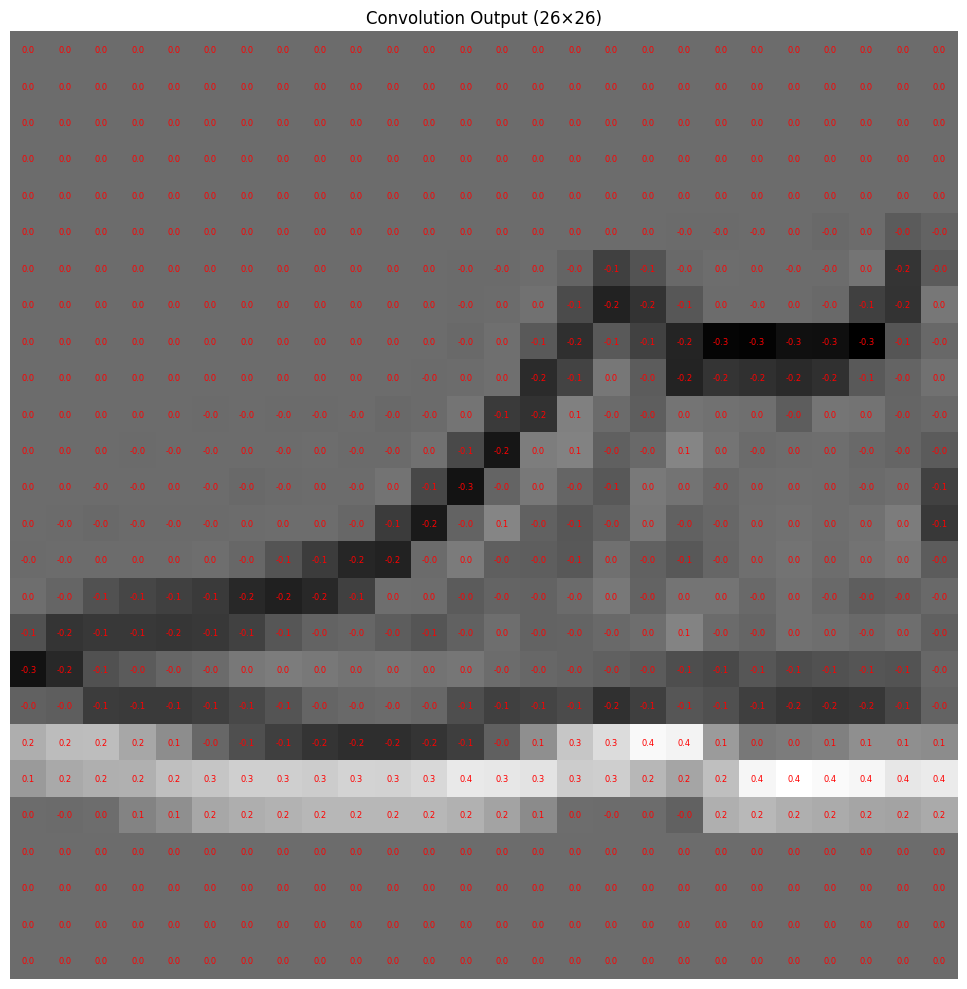

In [48]:
# Visulaize the output after convolution
plt.figure(figsize=(10, 10))
plt.imshow(conv, cmap='gray')
plt.title("Convolution Output (26×26)")
plt.axis('off')

# Annotate all 26×26 values
for y in range(26):
    for x in range(26):
        plt.text(x, y, f"{conv[y, x]:.1f}", color='red', fontsize=6,
                 ha='center', va='center')

plt.tight_layout()
plt.show()


In [49]:
# Apply ReLU
relu = tf.nn.relu(conv).numpy()

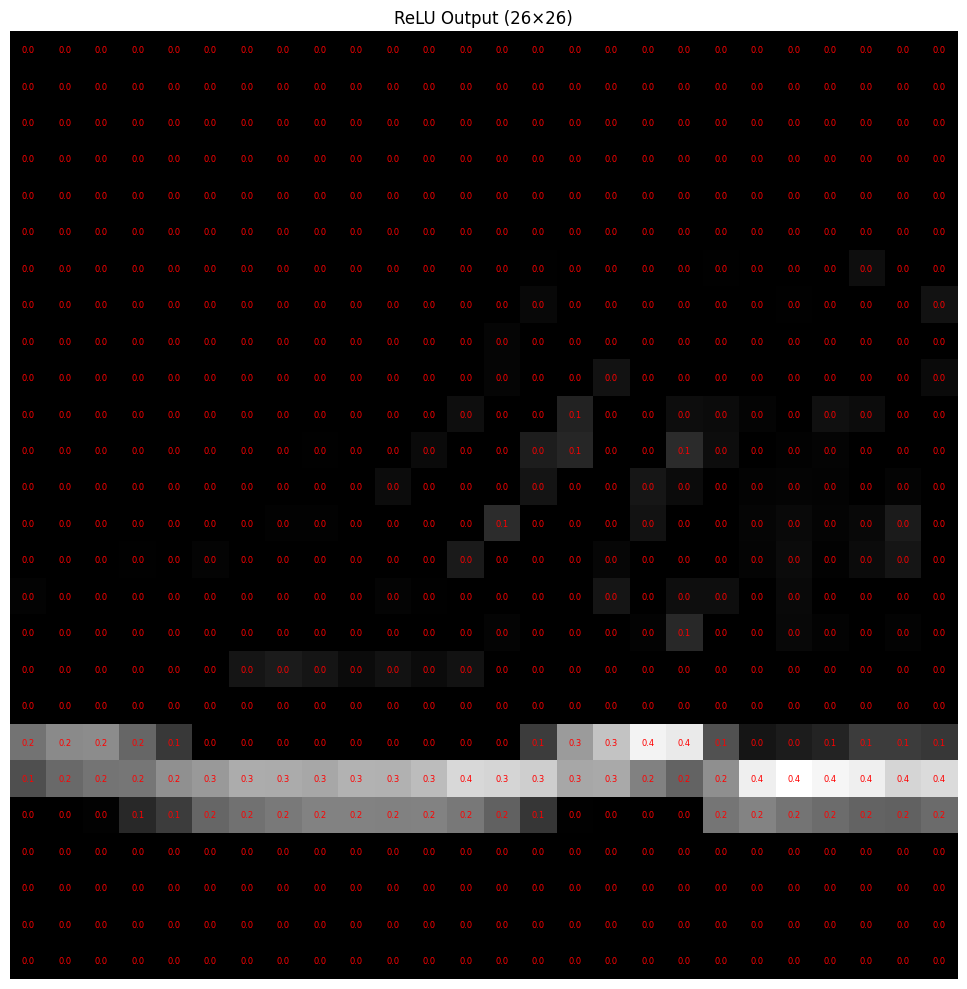

In [50]:
#Show the output after ReLU

plt.figure(figsize=(10, 10))
plt.imshow(relu, cmap='gray')
plt.title("ReLU Output (26×26)")
plt.axis('off')

# Annotate all 26×26 values after ReLU
for y in range(26):
    for x in range(26):
        plt.text(x, y, f"{relu[y, x]:.1f}", color='red', fontsize=6,
                 ha='center', va='center')

plt.tight_layout()
plt.show()


In [51]:
pool = tf.nn.max_pool2d(relu[None, :, :, None], ksize=2, strides=2, padding='VALID')
pool = pool.numpy()[0, :, :, 0]

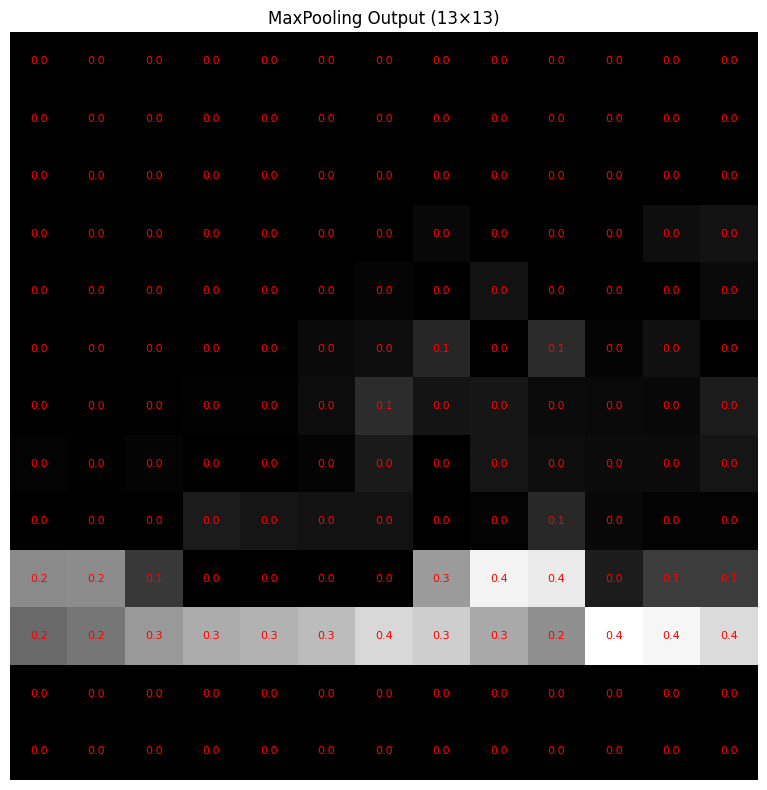

In [52]:
#Visualize MaxPooling Output (13×13) with Values
plt.figure(figsize=(8, 8))
plt.imshow(pool, cmap='gray')
plt.title("MaxPooling Output (13×13)")
plt.axis('off')

# Annotate all 13×13 values after max pooling
for y in range(13):
    for x in range(13):
        plt.text(x, y, f"{pool[y, x]:.1f}", color='red', fontsize=8,
                 ha='center', va='center')

plt.tight_layout()
plt.show()



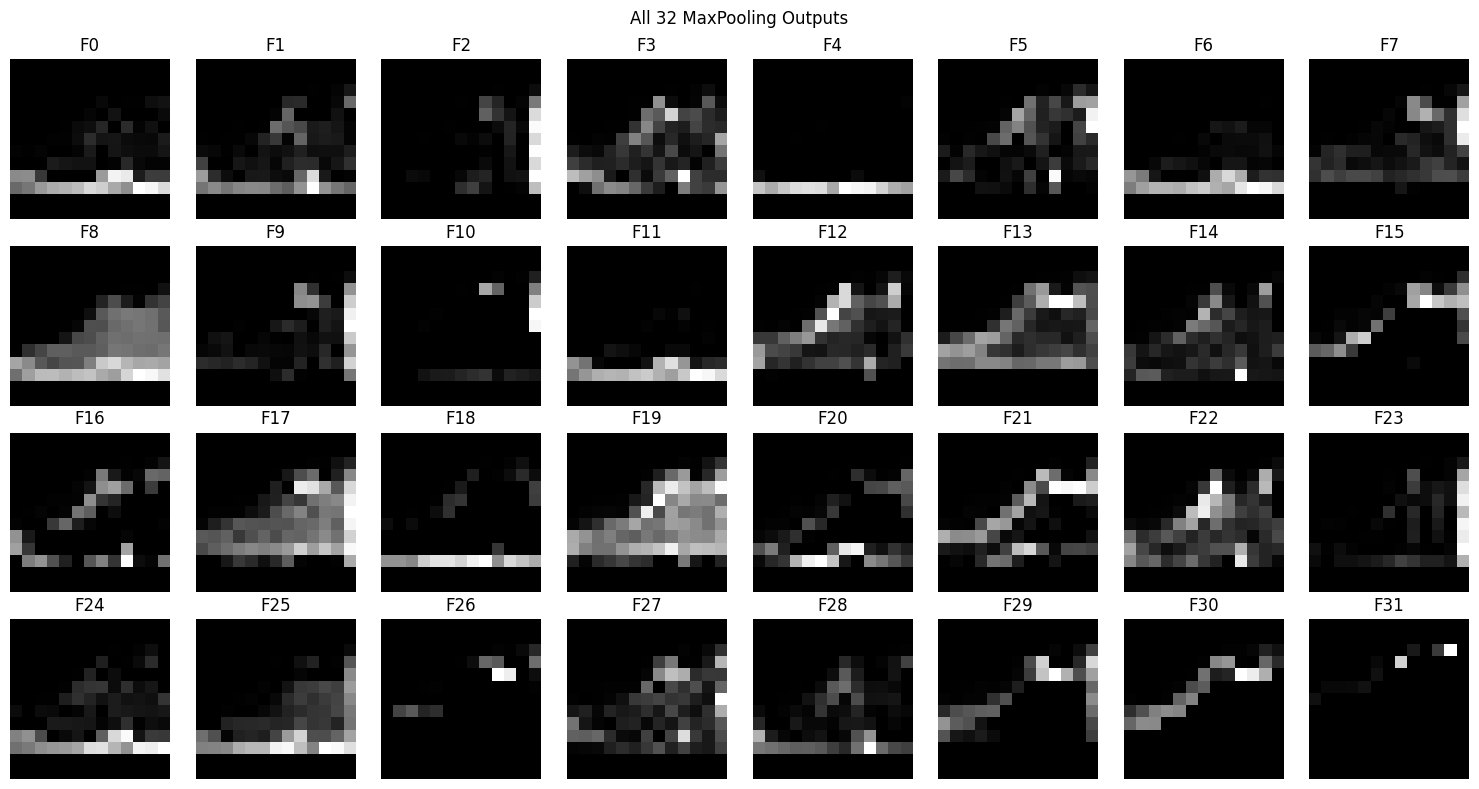

In [53]:
# Get full feature maps after ReLU
feature_maps = tf.nn.relu(tf.nn.conv2d(img, filters, strides=1, padding='VALID'))

# Apply MaxPooling
pooled_maps = tf.nn.max_pool2d(feature_maps, ksize=2, strides=2, padding='VALID')

# Plot all 32 pooled outputs
plt.figure(figsize=(15, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(pooled_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f"F{i}")
plt.suptitle("All 32 MaxPooling Outputs")
plt.tight_layout()
plt.show()


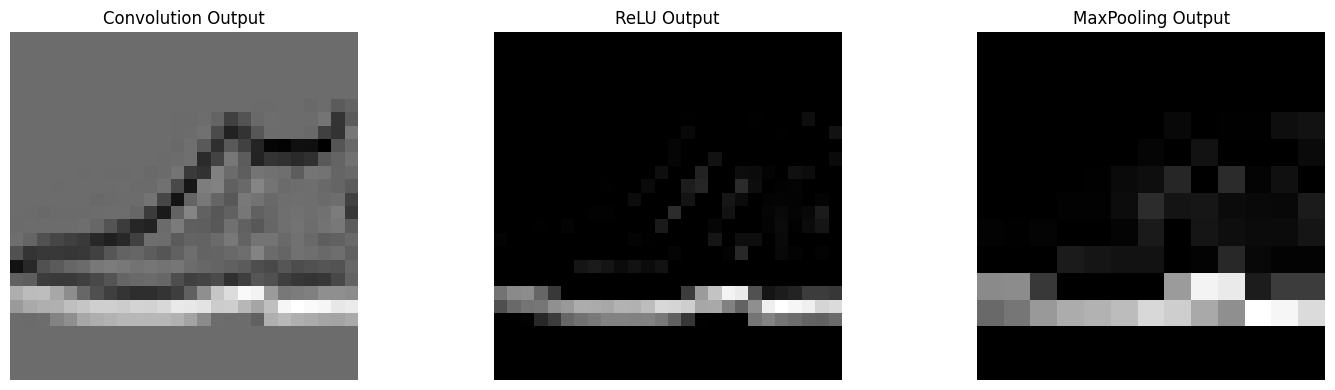

In [54]:
# ------------------------
# Show all outputs side-by-side
titles = ["Convolution Output", "ReLU Output", "MaxPooling Output"]
outputs = [conv, relu, pool]

plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(outputs[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
